In [4]:
import pandas as pd
df = pd.read_csv("c:/data/mushroom/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
from sklearn.preprocessing import LabelEncoder
# 카테고리형 데이터를 숫자형으로 변환하는 함수
# 주의할 부분이 있음(가중치가 붙을 수 있음)
lbl=LabelEncoder()
for col in df.columns:
    df[col]=lbl.fit_transform(df[col])
    print(lbl.classes_)

['e' 'p']
['b' 'c' 'f' 'k' 's' 'x']
['f' 'g' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
['f' 't']
['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
['a' 'f']
['c' 'w']
['b' 'n']
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
['e' 't']
['?' 'b' 'c' 'e' 'r']
['f' 'k' 's' 'y']
['f' 'k' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
['p']
['n' 'o' 'w' 'y']
['n' 'o' 't']
['e' 'f' 'l' 'n' 'p']
['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
['a' 'c' 'n' 's' 'v' 'y']
['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [7]:
X=df.iloc[:, 1:]
y=df['class']
df['class'].value_counts() 
# 0 식용 4208, 1 독버섯 3916

0    4208
1    3916
Name: class, dtype: int64

In [8]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=X.columns )
#원핫인코딩
X_samp = pd.get_dummies(X_samp,columns=X_samp.columns,drop_first=True)
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df_samp = pd.concat([X_samp,y_samp],axis=1)
df_samp.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6,class
0,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [9]:
df_samp['class'].value_counts() 
# 0 식용 3916, 1 독버섯 3916

0    3916
1    3916
Name: class, dtype: int64

In [10]:
X=df_samp.iloc[:, :-1]
y=df_samp['class']
print(X.head())
print(y.head())

   cap-shape_1  cap-shape_2  cap-shape_3  cap-shape_4  cap-shape_5  \
0            0            1            0            0            0   
1            0            0            0            0            1   
2            0            1            0            0            0   
3            0            0            0            1            0   
4            0            1            0            0            0   

   cap-surface_1  cap-surface_2  cap-surface_3  cap-color_1  cap-color_2  ...  \
0              0              0              1            0            1  ...   
1              0              0              0            0            0  ...   
2              0              0              0            0            0  ...   
3              0              0              0            0            0  ...   
4              0              0              1            0            1  ...   

   population_2  population_3  population_4  population_5  habitat_1  \
0             0     

In [11]:
from sklearn.model_selection import train_test_split
# 학습용 데이터셋과 검증용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# 모형 평가
from sklearn.metrics import accuracy_score, classification_report
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
print("정답률 :", score)
print("리포트 :\n", report)
#100% 분류 성공

정답률 : 1.0
리포트 :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       979
           1       1.00      1.00      1.00       979

    accuracy                           1.00      1958
   macro avg       1.00      1.00      1.00      1958
weighted avg       1.00      1.00      1.00      1958



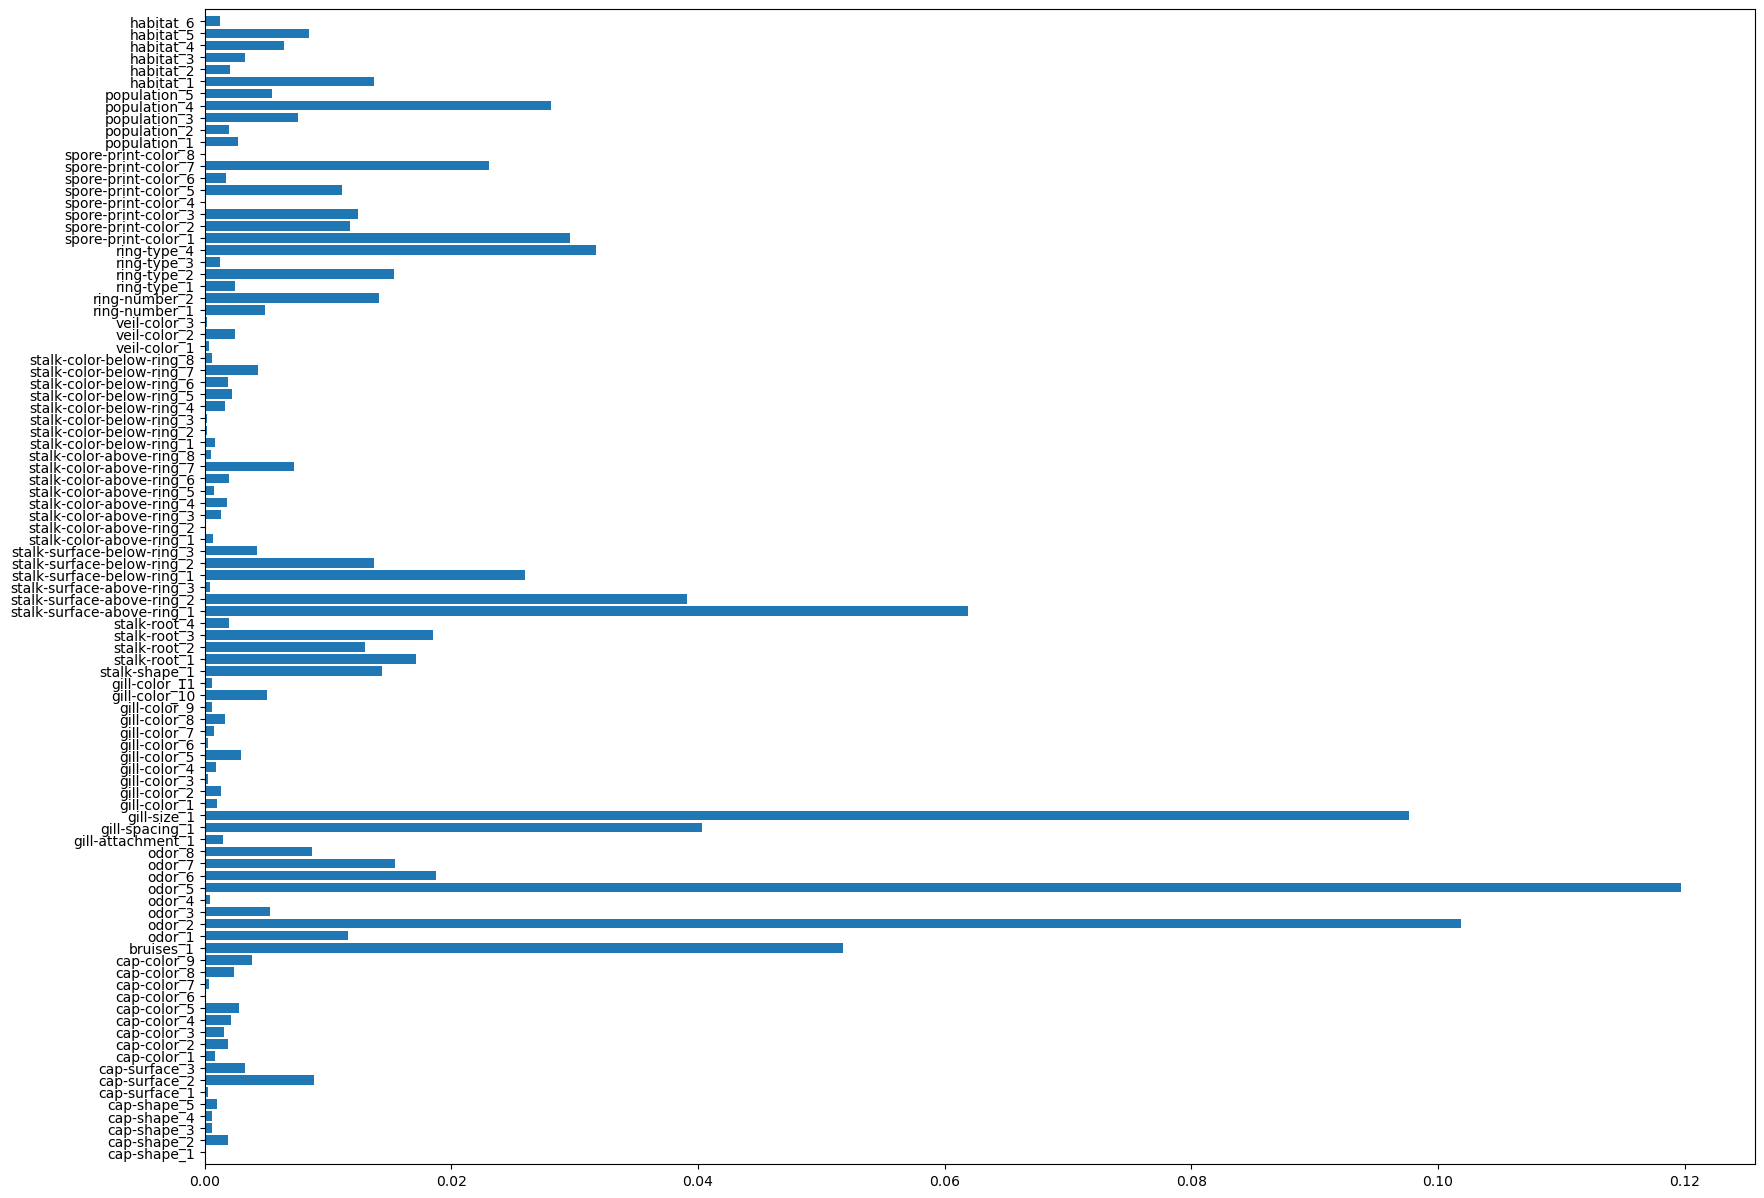

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    #                                   변수 중요도
    plt.yticks(np.arange(n_features), X.columns)
    plt.ylim(-1, n_features)

plt.figure(figsize=(20,15))
plot_tree(model)  

In [15]:
# 중요도 가장 높은 변수의 인덱스
np.argmax(model.feature_importances_)

22

In [16]:
X.columns[22]

'odor_5'